In [46]:
%load_ext autoreload
%autoreload 2

import networkx as nx
import pandas as pd
import numpy as np
from krxns.net_construction import construct_reaction_network, extract_compounds
from krxns.config import filepaths
from krxns.utils import str2int
from krxns.cheminfo import expand_unpaired_cofactors, draw_reaction, draw_molecule, standardize_smiles
from krxns.networks import SuperMultiDiGraph
import json
from IPython.display import SVG

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [47]:
# Load unpaired cofs
unpaired_fp = filepaths['cofactors'] / "unpaired_cofactors_reference.tsv"
name_blacklist = [
    'acetyl-CoA',
]

unpaired_ref = pd.read_csv(
    filepath_or_buffer=unpaired_fp,
    sep='\t'
)

filtered_unpaired = unpaired_ref.loc[~unpaired_ref['Name'].isin(name_blacklist), :]
cofactors = expand_unpaired_cofactors(filtered_unpaired, k=10)

manual = {
    'N#N': 'N2',
    '[H][H]': 'H2',
    'S': 'hydrogen sufide',
    '[Cl-]': 'chloride',
    '[Na+]': 'sodium'
}

cofactors = {**cofactors, ** manual}

# Load cc sim mats
cc_sim_mats = {
    'mcs': np.load(filepaths['sim_mats'] / "mcs.npy"),
    'tanimoto': np.load(filepaths['sim_mats'] / "tanimoto.npy")
}

# Load known reaction data
with open(filepaths['data'] / 'sprhea_240310_v3_mapped.json', 'r') as f:
    krs = json.load(f)

# Load op connected reactions
with open(filepaths['connected_reactions'] / 'sprhea_240310_v3_mapped_operator.json', 'r') as f:
    op_cxns = str2int(json.load(f))

kcs, smi2id = extract_compounds(krs)

[17:16:42] WARNING: not removing hydrogen atom without neighbors


In [48]:
G = SuperMultiDiGraph()
edges, nodes = construct_reaction_network(operator_connections=op_cxns, reactions=krs, cofactors=cofactors)
G.add_nodes_from(nodes)
edge_keys = G.add_edges_from(edges)

In [56]:
def show_path(from_i, to_j, topk = 1):
    path = nx.shortest_path(G, from_i, to_j)
    for i in range(len(path) - 1):
        print(f"STEP {i+1} ")
        for edge in G.get_edges_between(path[i], path[i+1])[:topk]:
            print([(k, v) for k, v in edge.items() if k != 'smarts'])
            display(SVG(draw_reaction(edge['smarts'])))

STEP 1 
[('rid', 11792), ('rhea_ids', [58058]), ('imt_rules', ['rule0031_7']), ('weight', 0.8333333333333334)]


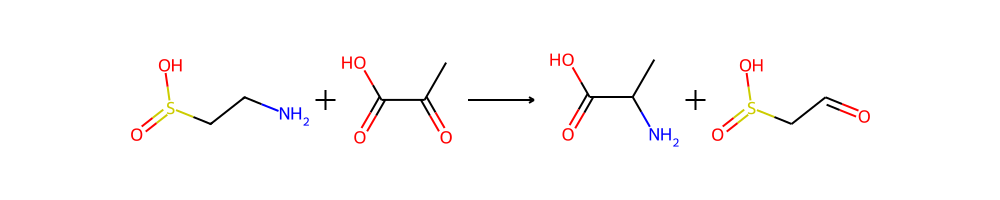

STEP 2 
[('rid', 4866), ('rhea_ids', [12623]), ('imt_rules', ['rule0023_13']), ('weight', 0.6666666666666666)]


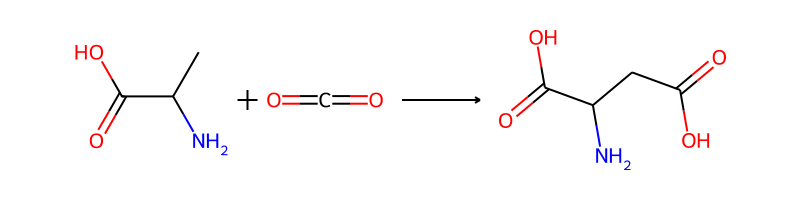

STEP 3 
[('rid', 3406), ('rhea_ids', [16603]), ('imt_rules', ['rule0257_1']), ('weight', 1.0)]


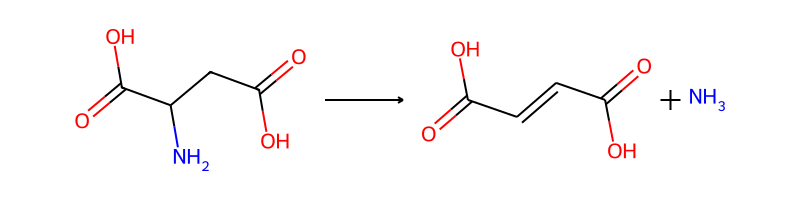

STEP 4 
[('rid', 1638), ('rhea_ids', [40524]), ('imt_rules', ['rule0420_1']), ('weight', 1.0)]


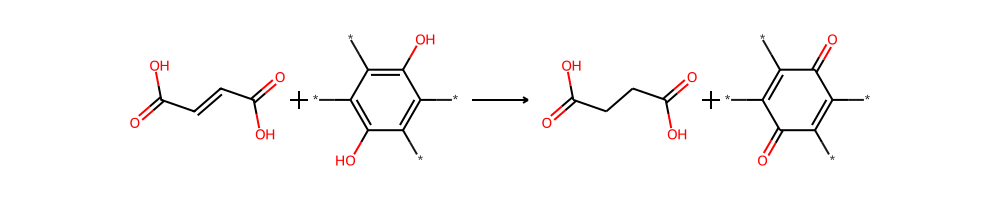

In [57]:
i = G.get_nodes_by_prop('name', 'pyruvate')[0]
j  = G.get_nodes_by_prop('name', 'succinate')[0]
show_path(i, j)

STEP 1 
[('rid', 485), ('rhea_ids', [16811, 57506]), ('imt_rules', ['rule0051_08']), ('weight', 0.5714285714285714)]


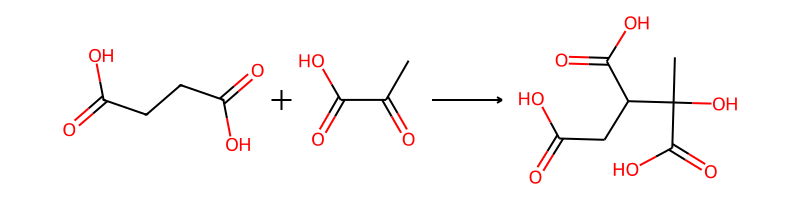

STEP 2 
[('rid', 485), ('rhea_ids', [16811, 57506]), ('imt_rules', ['rule0051_08']), ('weight', 1.0)]


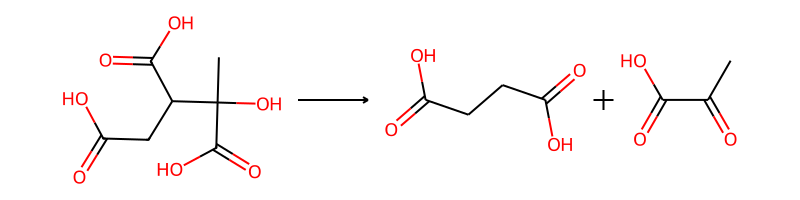

In [58]:
show_path(j, i)

STEP 1 
[('rid', 12191), ('rhea_ids', [49637]), ('imt_rules', ['rule0145_5']), ('weight', 1.0)]


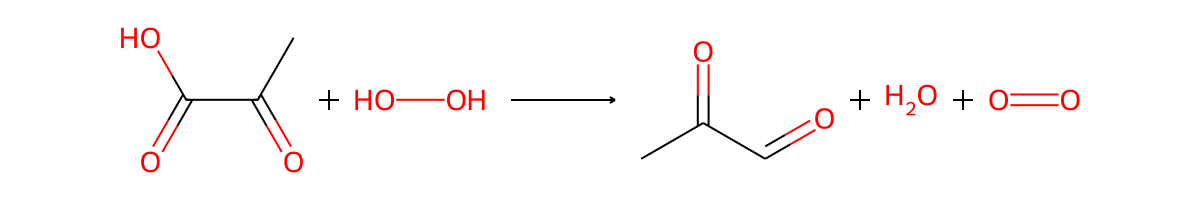

STEP 2 
[('rid', 4467), ('rhea_ids', [27987]), ('imt_rules', ['rule0002_143']), ('weight', 1.0)]


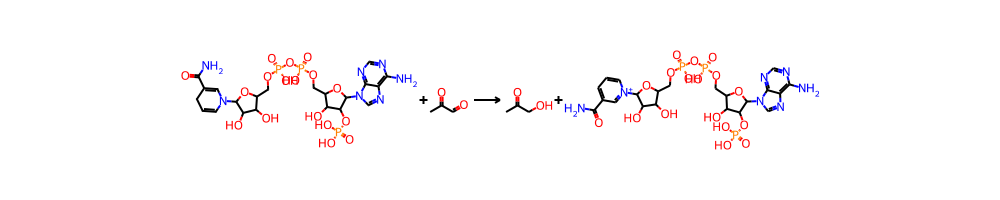

[('rid', 16356), ('rhea_ids', [35616]), ('imt_rules', ['rule0002_143']), ('weight', 1.0)]


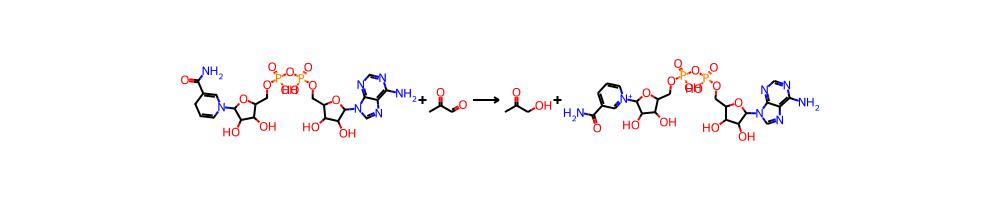

STEP 3 
[('rid', 7031), ('rhea_ids', [55790]), ('imt_rules', ['rule0005_60']), ('weight', 1.0)]


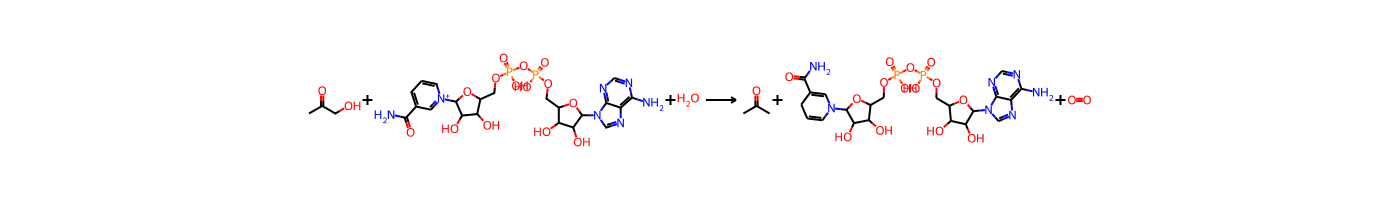

In [51]:
i = G.get_nodes_by_prop('name', 'pyruvate')[0]
j  = G.get_nodes_by_prop('name', 'acetone')[0]
show_path(i, j)

STEP 1 
[('rid', 4175), ('rhea_ids', [20765]), ('imt_rules', ['rule0126_1']), ('weight', 0.6666666666666666)]


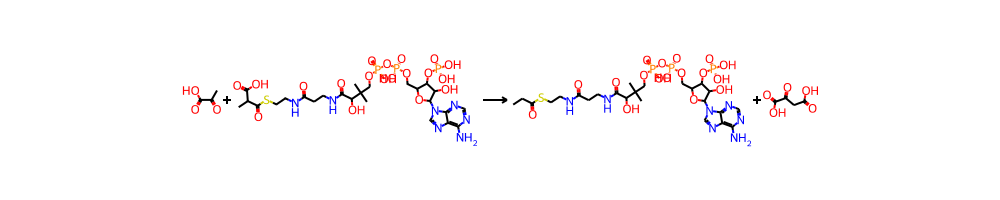

[('rid', 1565), ('rhea_ids', [15642]), ('imt_rules', ['rule0024_44']), ('weight', 0.6666666666666666)]


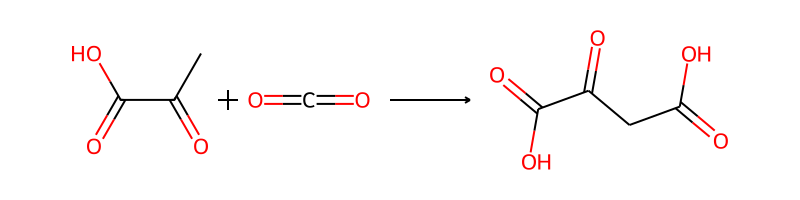

STEP 2 
[('rid', 3111), ('rhea_ids', [10761]), ('imt_rules', ['rule0053_09']), ('weight', 0.6923076923076923)]


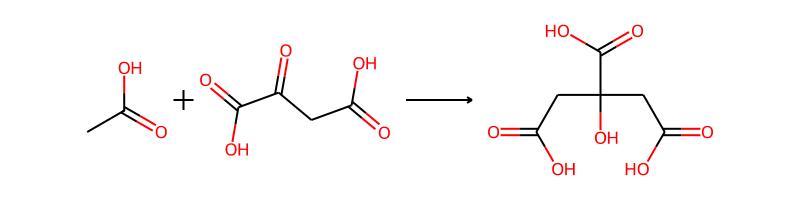

[('rid', 502), ('rhea_ids', [16846]), ('imt_rules', ['rule0137_3']), ('weight', 0.6923076923076923)]


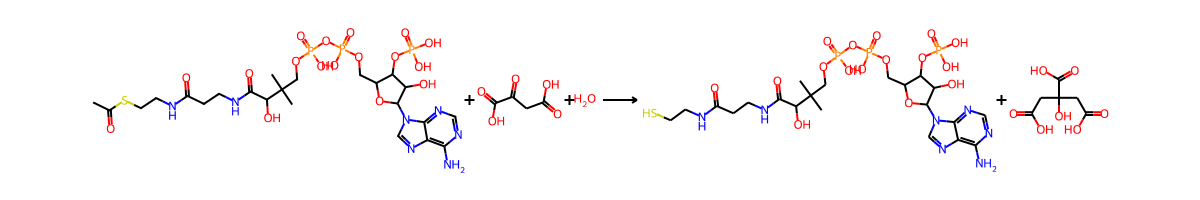

STEP 3 
[('rid', 2323), ('rhea_ids', [40044]), ('imt_rules', ['rule0050_04']), ('weight', 0.5454545454545454)]


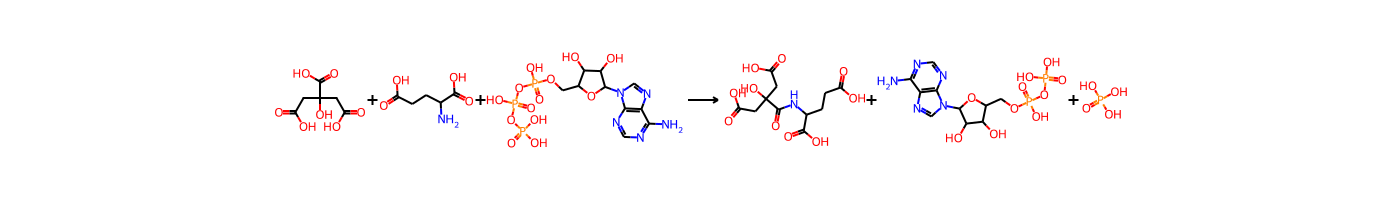

STEP 4 
[('rid', 2323), ('rhea_ids', [40044]), ('imt_rules', ['rule0050_04']), ('weight', 1.0)]


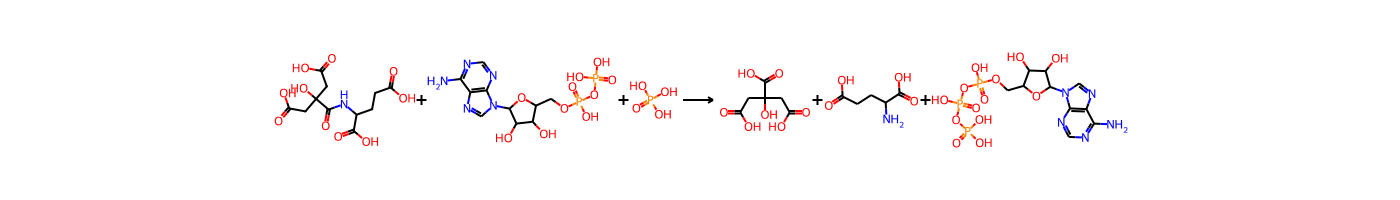

STEP 5 
[('rid', 14801), ('rhea_ids', [10022]), ('imt_rules', ['rule0156_3']), ('weight', 0.5263157894736842)]


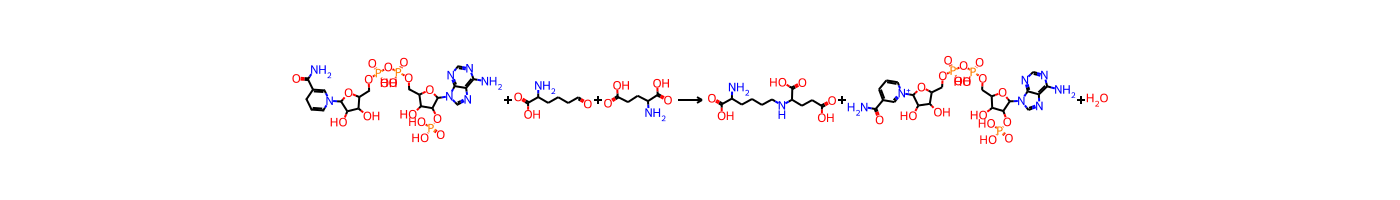

[('rid', 14371), ('rhea_ids', [28211]), ('imt_rules', ['rule0113_3']), ('weight', 0.5263157894736842)]


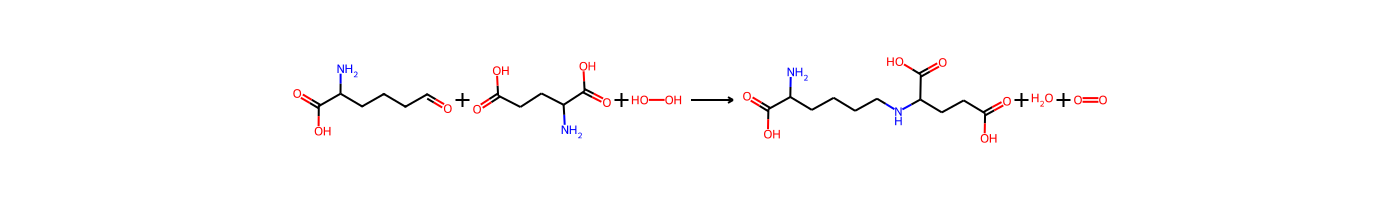

[('rid', 5102), ('rhea_ids', [24521]), ('imt_rules', ['rule0157_1']), ('weight', 0.5263157894736842)]


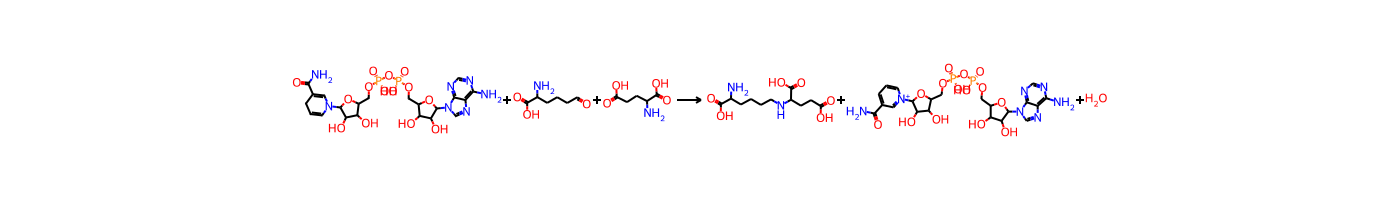

STEP 6 
[('rid', 4447), ('rhea_ids', [12442]), ('imt_rules', ['rule0156_1']), ('weight', 1.0)]


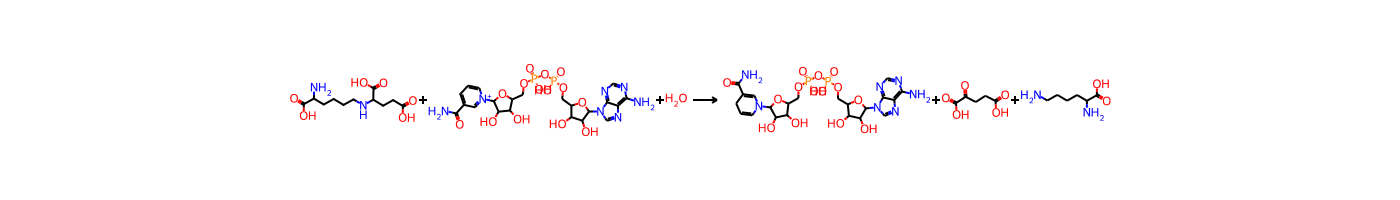

[('rid', 1292), ('rhea_ids', [19375]), ('imt_rules', ['rule0156_1']), ('weight', 1.0)]


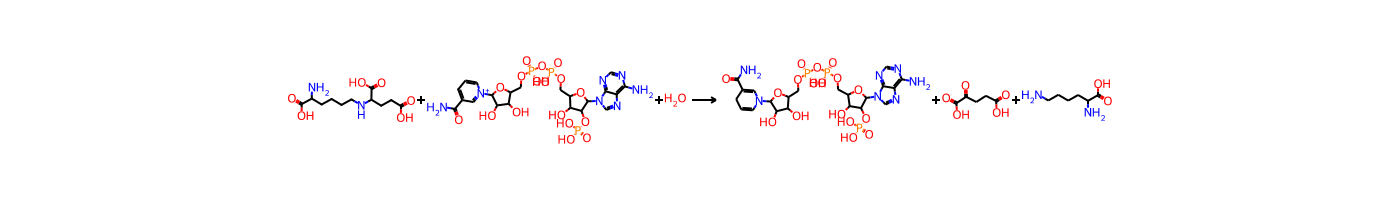

In [52]:
i = G.get_nodes_by_prop('name', 'pyruvate')[0]
j  = G.get_nodes_by_prop('name', 'L-lysine')[0]
show_path(i, j)

In [53]:
sorted([node['name'] for id, node in G.nodes(data=True)], key=lambda x : len(x))

['',
 '',
 '',
 'FMN',
 'FAD',
 'TDP',
 'TTP',
 'CMP',
 'CDP',
 'CTP',
 'GMP',
 'GDP',
 'GTP',
 'AMP',
 'ADP',
 'ATP',
 'XMP',
 'IDP',
 'ITP',
 'UMP',
 'UDP',
 'UTP',
 'dTMP',
 'dTDP',
 'dTTP',
 'NADH',
 'urea',
 'dZMP',
 'dZDP',
 'dZTP',
 'dGMP',
 'dGTP',
 'dADP',
 'dATP',
 'taxol',
 'OPC-6',
 'SN-38',
 'NADPH',
 'DIBOA',
 'Lc4Cer',
 'heme b',
 'phytol',
 'citral',
 'prenol',
 'lutein',
 'mogrol',
 'DIMBOA',
 'emodin',
 'harmol',
 'biuret',
 'NAD(+)',
 'L-dopa',
 'A47934',
 "3'-GMP",
 "3'-AMP",
 'benzil',
 'biotin',
 'uracil',
 'phenol',
 'indole',
 'a thiol',
 'methane',
 'steviol',
 'propene',
 'styrene',
 'acetate',
 'acetone',
 'lactate',
 'estrone',
 'propane',
 'tylosin',
 'butanal',
 'hexanal',
 'heptane',
 'octanal',
 'nonanal',
 'decanal',
 'ethanol',
 'tropine',
 'loganin',
 'cocaine',
 'velutin',
 'questin',
 'pilosin',
 'codeine',
 'choline',
 'thymine',
 'toluene',
 'dhurrin',
 'oxamate',
 'triuret',
 'NADP(+)',
 'serinol',
 'glycine',
 'neamine',
 'taurine',
 'aniline',


In [54]:
id = G.get_nodes_by_prop('name', 'chorismate')[0]
for i in nx.ego_graph(G, id, radius=2):
    print(G.nodes[i])

{'smiles': 'CC(O)C(O)CC(=O)C(=O)O', 'name': '2-dehydro-3-deoxy-L-rhamnonate'}
{'smiles': 'CC(C)=CCCC(C)=CCc1cc(C(=O)O)ccc1O', 'name': '3-geranyl-4-hydroxybenzoate'}
{'smiles': 'O=C(O)CC(=O)C(=O)O', 'name': 'oxaloacetate'}
{'smiles': 'CC(=O)C=O', 'name': 'methylglyoxal'}
{'smiles': 'CC=O', 'name': 'acetaldehyde'}
{'smiles': 'CC(O)CC(=O)C(=O)O', 'name': '(S)-4-hydroxy-2-oxopentanoate'}
{'smiles': 'Nc1ccc(C(=O)O)cc1', 'name': '4-aminobenzoate'}
{'smiles': 'NC(CO)C(=O)O', 'name': 'L-serine'}
{'smiles': 'CC(C(=O)O)C(C)(O)C(=O)O', 'name': '(2R,3S)-2,3-dimethylmalate'}
{'smiles': 'CC(N)C(=O)O', 'name': 'L-alanine'}
{'smiles': 'O=C(O)C1=CC(O)C(O)C=C1', 'name': '(3R,4R)-3,4-dihydroxy-3,4-dihydrobenzoate'}
{'smiles': 'O=C(O)C1=CC=CC(O)C1O', 'name': '(2S,3S)-2,3-dihydroxy-2,3-dihydrobenzoate'}
{'smiles': 'CC(C)(COP(=O)(O)OP(=O)(O)OCC1OC(n2cnc3c(N)ncnc32)C(O)C1OP(=O)(O)O)C(O)C(=O)NCCC(=O)NCCSC(=O)c1ccc(O)cc1', 'name': '4-hydroxybenzoyl-CoA'}
{'smiles': 'CC(O)(CC(=O)C(=O)O)C(=O)O', 'name': '4-hydro

PATH TO 2-dehydro-3-deoxy-L-rhamnonate
STEP 1 
[('rid', 3291), ('rhea_ids', [38321]), ('imt_rules', ['rule0583_1']), ('weight', 0.8333333333333334)]


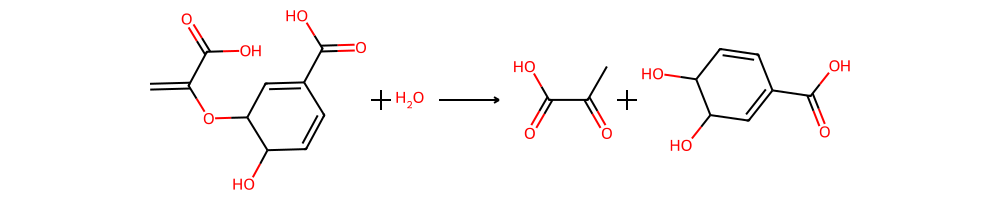

[('rid', 1220), ('rhea_ids', [16506]), ('imt_rules', ['rule0457_1']), ('weight', 1.0)]


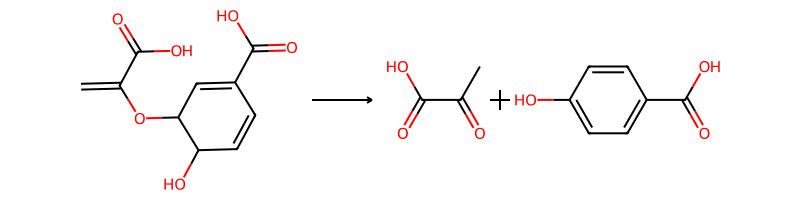

STEP 2 
[('rid', 1881), ('rhea_ids', [25786]), ('imt_rules', ['rule0051_01']), ('weight', 0.5454545454545454)]


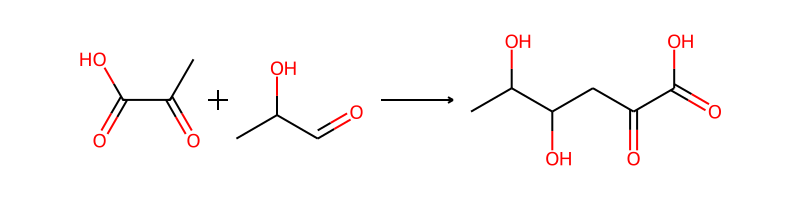

PATH TO 3-geranyl-4-hydroxybenzoate
STEP 1 
[('rid', 1220), ('rhea_ids', [16506]), ('imt_rules', ['rule0457_1']), ('weight', 1.0)]


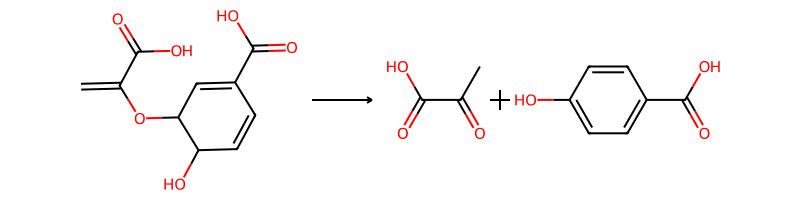

STEP 2 
[('rid', 12349), ('rhea_ids', [27855]), ('imt_rules', ['rule0181_1']), ('weight', 0.5)]


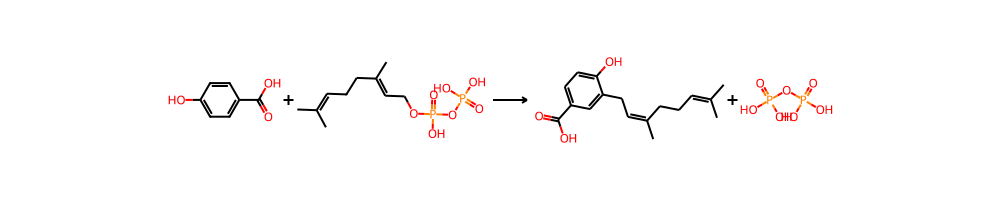

PATH TO oxaloacetate
STEP 1 
[('rid', 3291), ('rhea_ids', [38321]), ('imt_rules', ['rule0583_1']), ('weight', 0.8333333333333334)]


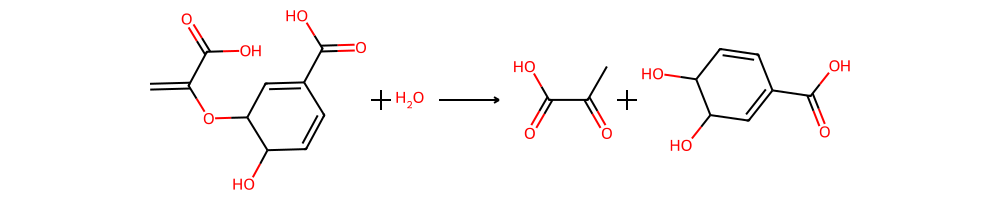

[('rid', 1220), ('rhea_ids', [16506]), ('imt_rules', ['rule0457_1']), ('weight', 1.0)]


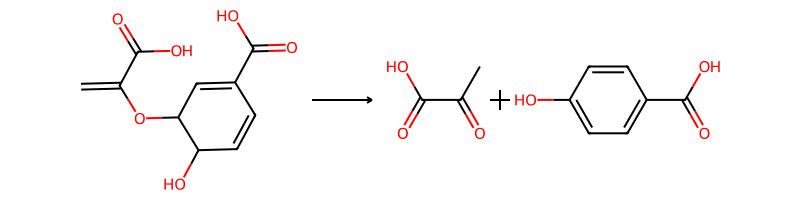

STEP 2 
[('rid', 4175), ('rhea_ids', [20765]), ('imt_rules', ['rule0126_1']), ('weight', 0.6666666666666666)]


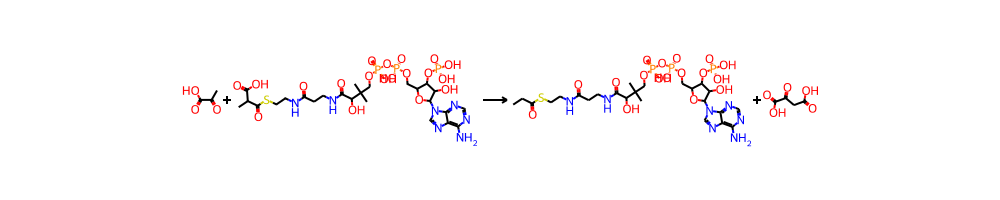

[('rid', 1565), ('rhea_ids', [15642]), ('imt_rules', ['rule0024_44']), ('weight', 0.6666666666666666)]


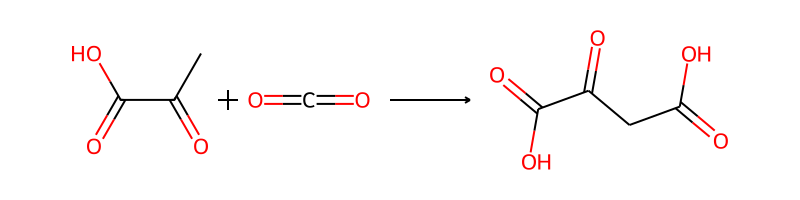

PATH TO methylglyoxal
STEP 1 
[('rid', 3291), ('rhea_ids', [38321]), ('imt_rules', ['rule0583_1']), ('weight', 0.8333333333333334)]


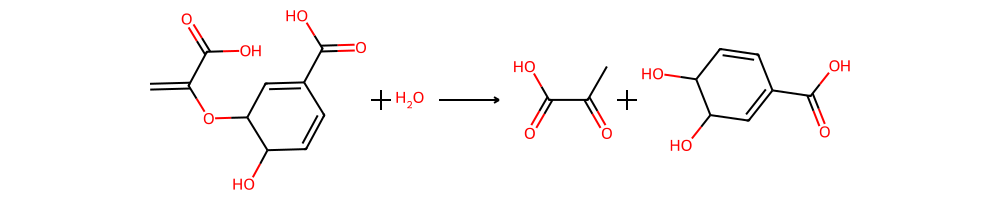

[('rid', 1220), ('rhea_ids', [16506]), ('imt_rules', ['rule0457_1']), ('weight', 1.0)]


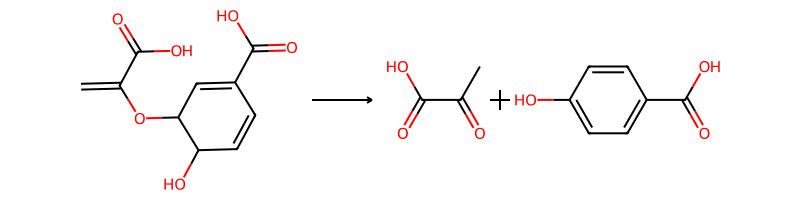

STEP 2 
[('rid', 12191), ('rhea_ids', [49637]), ('imt_rules', ['rule0145_5']), ('weight', 1.0)]


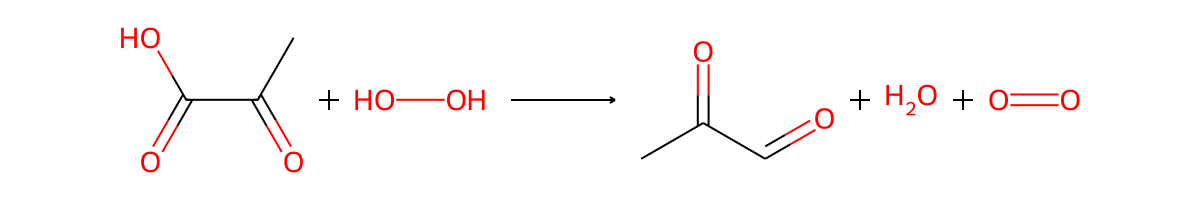

PATH TO acetaldehyde
STEP 1 
[('rid', 3291), ('rhea_ids', [38321]), ('imt_rules', ['rule0583_1']), ('weight', 0.8333333333333334)]


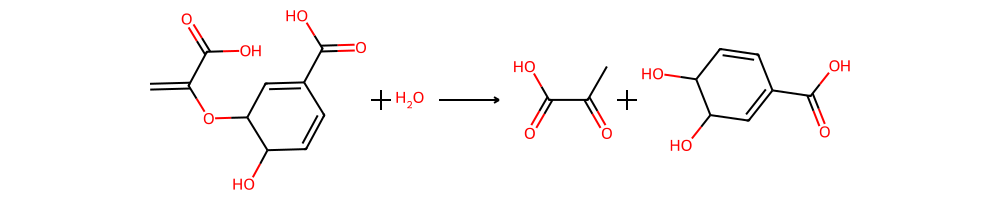

[('rid', 1220), ('rhea_ids', [16506]), ('imt_rules', ['rule0457_1']), ('weight', 1.0)]


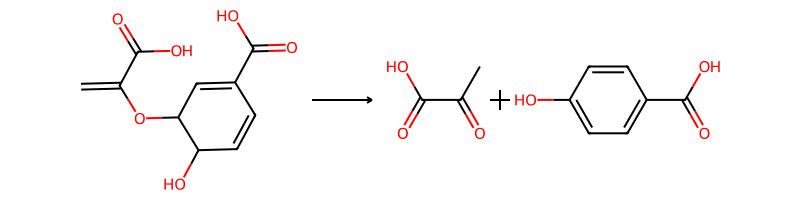

STEP 2 
[('rid', 3609), ('rhea_ids', [45486]), ('imt_rules', ['rule0023_18']), ('weight', 1.0)]


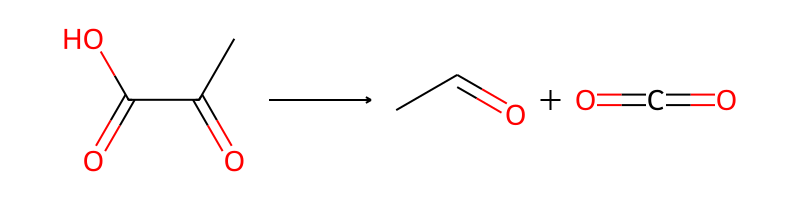

PATH TO (S)-4-hydroxy-2-oxopentanoate
STEP 1 
[('rid', 3291), ('rhea_ids', [38321]), ('imt_rules', ['rule0583_1']), ('weight', 0.8333333333333334)]


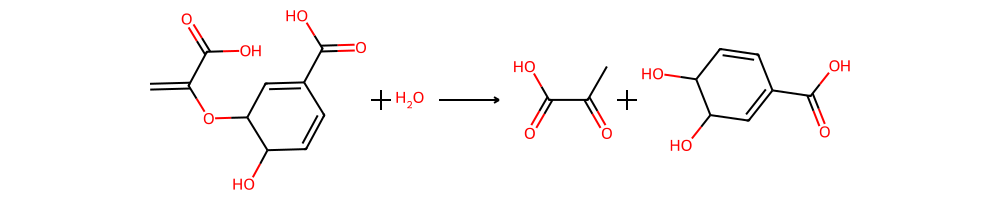

[('rid', 1220), ('rhea_ids', [16506]), ('imt_rules', ['rule0457_1']), ('weight', 1.0)]


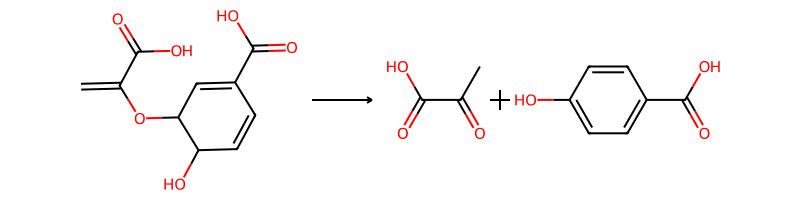

STEP 2 
[('rid', 1590), ('rhea_ids', [22626]), ('imt_rules', ['rule0051_02']), ('weight', 0.6666666666666666)]


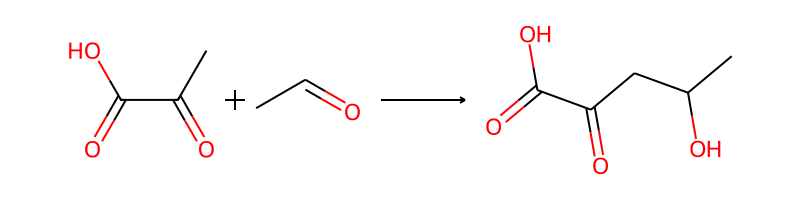

PATH TO 4-aminobenzoate
STEP 1 
[('rid', 2845), ('rhea_ids', [11673]), ('imt_rules', ['rule0361_1']), ('weight', 0.9375)]


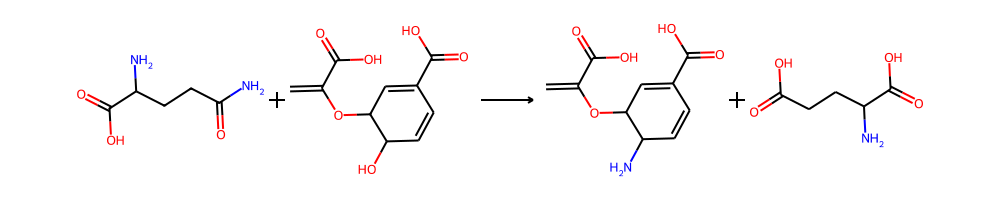

STEP 2 
[('rid', 1844), ('rhea_ids', [16202]), ('imt_rules', ['rule0457_1']), ('weight', 1.0)]


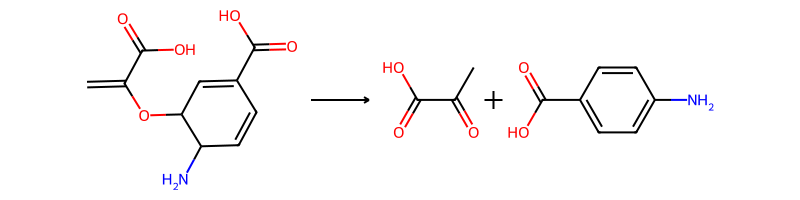

PATH TO L-serine
STEP 1 
[('rid', 3291), ('rhea_ids', [38321]), ('imt_rules', ['rule0583_1']), ('weight', 0.8333333333333334)]


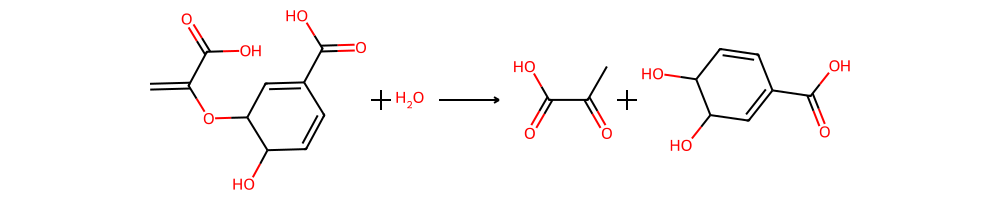

[('rid', 1220), ('rhea_ids', [16506]), ('imt_rules', ['rule0457_1']), ('weight', 1.0)]


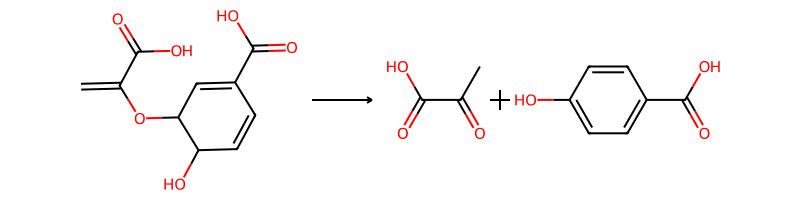

STEP 2 
[('rid', 855), ('rhea_ids', [13978, 19170]), ('imt_rules', ['rule0341_1']), ('weight', 0.8571428571428571)]


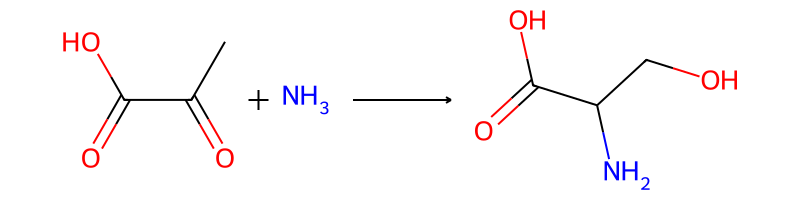

PATH TO (2R,3S)-2,3-dimethylmalate
STEP 1 
[('rid', 3291), ('rhea_ids', [38321]), ('imt_rules', ['rule0583_1']), ('weight', 0.8333333333333334)]


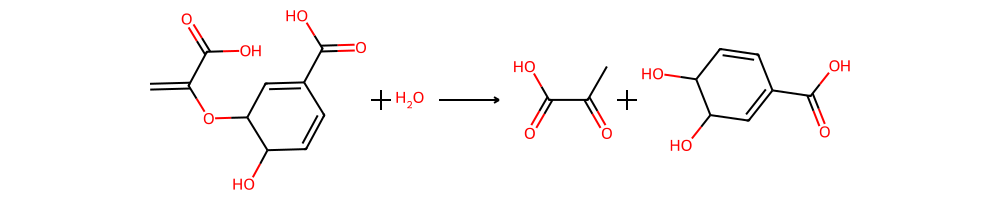

[('rid', 1220), ('rhea_ids', [16506]), ('imt_rules', ['rule0457_1']), ('weight', 1.0)]


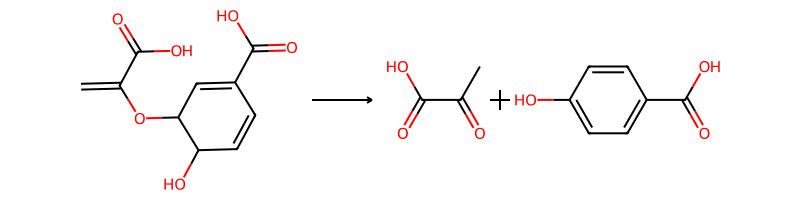

STEP 2 
[('rid', 19146), ('rhea_ids', [10474]), ('imt_rules', ['rule0051_08']), ('weight', 0.5454545454545454)]


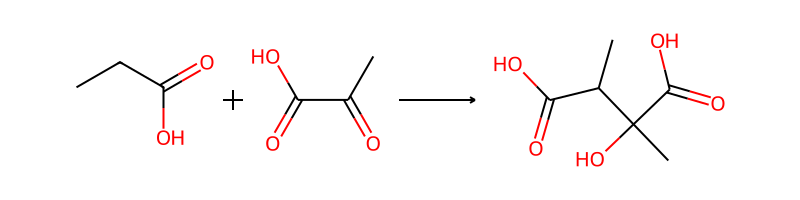

PATH TO L-alanine
STEP 1 
[('rid', 3291), ('rhea_ids', [38321]), ('imt_rules', ['rule0583_1']), ('weight', 0.8333333333333334)]


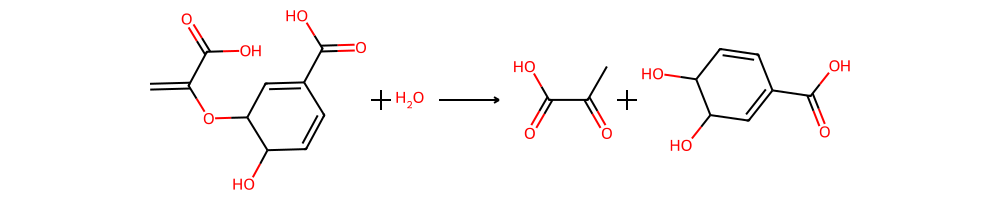

[('rid', 1220), ('rhea_ids', [16506]), ('imt_rules', ['rule0457_1']), ('weight', 1.0)]


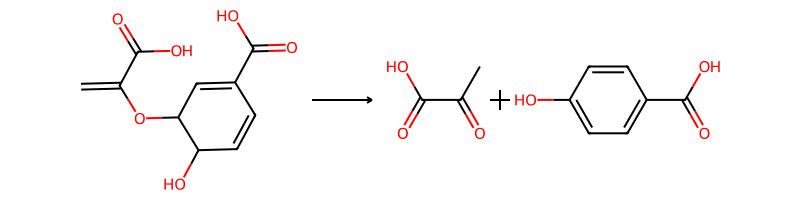

STEP 2 
[('rid', 11792), ('rhea_ids', [58058]), ('imt_rules', ['rule0031_7']), ('weight', 0.8333333333333334)]


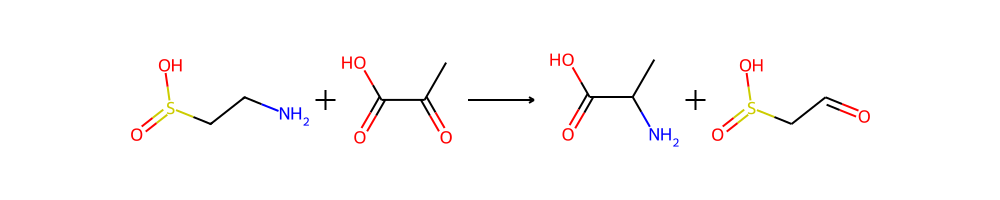

[('rid', 10097), ('rhea_ids', [32265]), ('imt_rules', ['rule0031_6']), ('weight', 0.8333333333333334)]


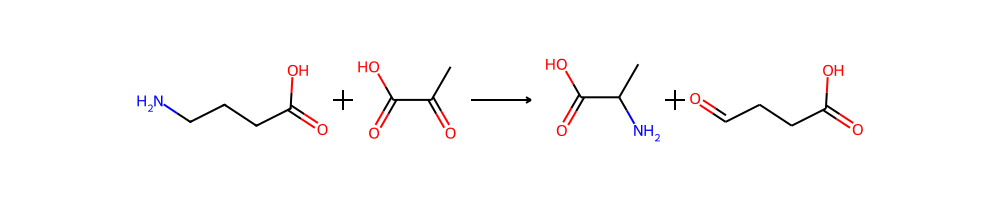

[('rid', 16111), ('rhea_ids', [64281]), ('imt_rules', ['rule0030_19']), ('weight', 0.8333333333333334)]


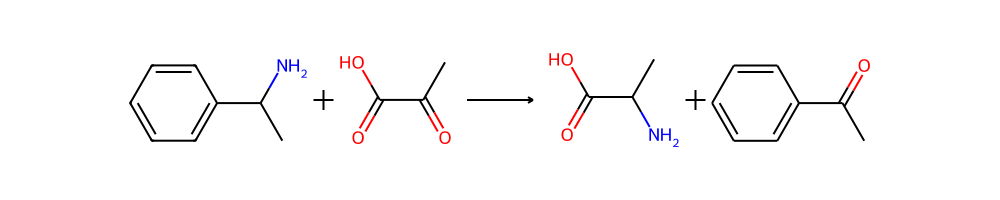

PATH TO (3R,4R)-3,4-dihydroxy-3,4-dihydrobenzoate
STEP 1 
[('rid', 3291), ('rhea_ids', [38321]), ('imt_rules', ['rule0583_1']), ('weight', 1.0)]


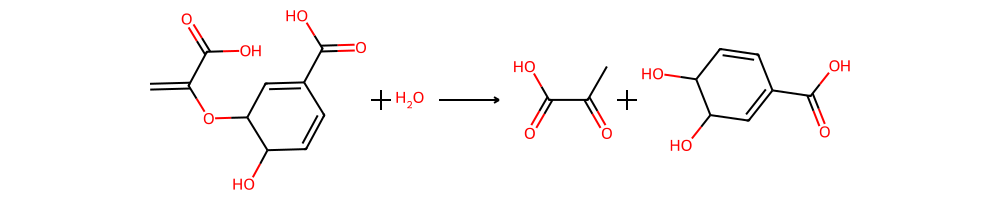

PATH TO (2S,3S)-2,3-dihydroxy-2,3-dihydrobenzoate
STEP 1 
[('rid', 6748), ('rhea_ids', [18986]), ('imt_rules', ['rule0028_50']), ('weight', 1.0)]


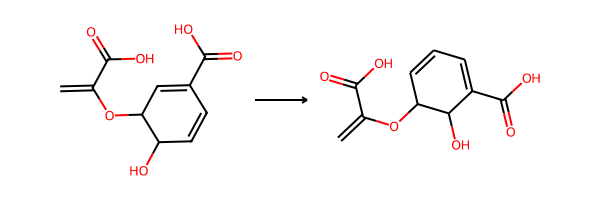

STEP 2 
[('rid', 1204), ('rhea_ids', [11114]), ('imt_rules', ['rule0583_1']), ('weight', 1.0)]


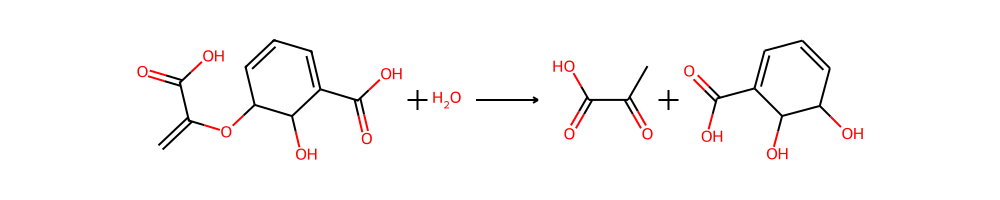

PATH TO 4-hydroxybenzoyl-CoA
STEP 1 
[('rid', 1220), ('rhea_ids', [16506]), ('imt_rules', ['rule0457_1']), ('weight', 1.0)]


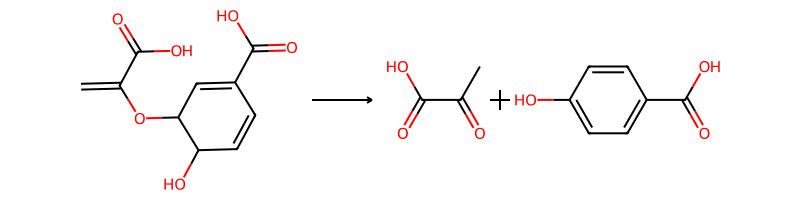

STEP 2 
[('rid', 10649), ('rhea_ids', [23117]), ('imt_rules', ['rule0039_07']), ('weight', 0.15789473684210525)]


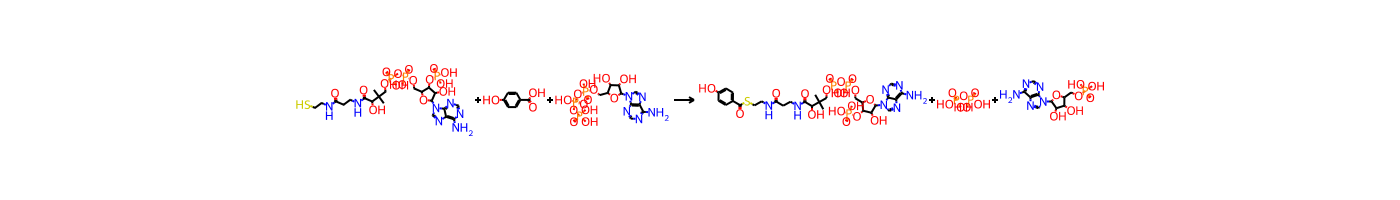

[('rid', 5573), ('rhea_ids', [11949]), ('imt_rules', ['rule0060_4']), ('weight', 0.15789473684210525)]


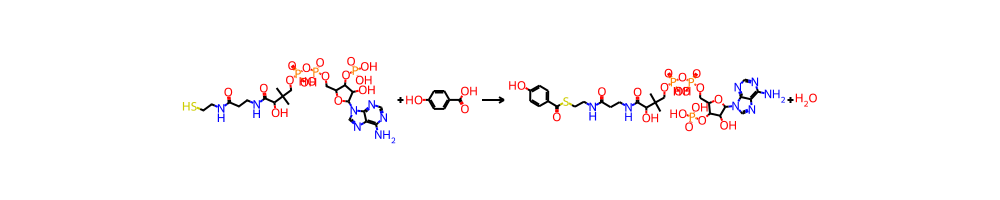

PATH TO 4-hydroxy-4-methyl-2-oxoglutarate
STEP 1 
[('rid', 3291), ('rhea_ids', [38321]), ('imt_rules', ['rule0583_1']), ('weight', 0.8333333333333334)]


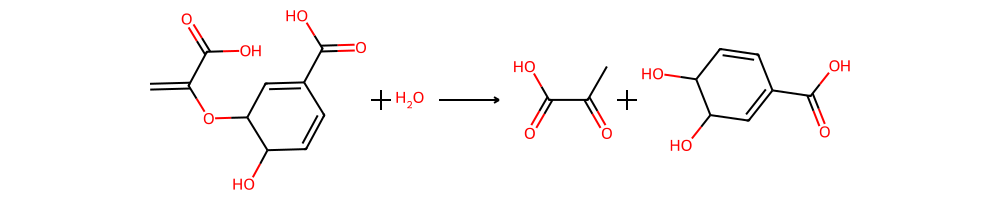

[('rid', 1220), ('rhea_ids', [16506]), ('imt_rules', ['rule0457_1']), ('weight', 1.0)]


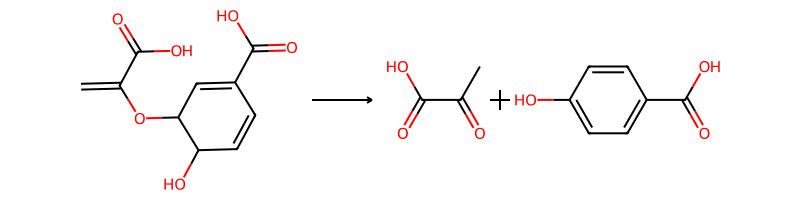

STEP 2 
[('rid', 275), ('rhea_ids', [22749]), ('imt_rules', ['rule0053_04']), ('weight', 0.5)]


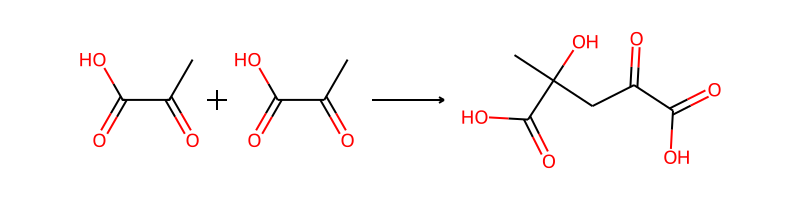

PATH TO 2-iminopropanoate
STEP 1 
[('rid', 3291), ('rhea_ids', [38321]), ('imt_rules', ['rule0583_1']), ('weight', 0.8333333333333334)]


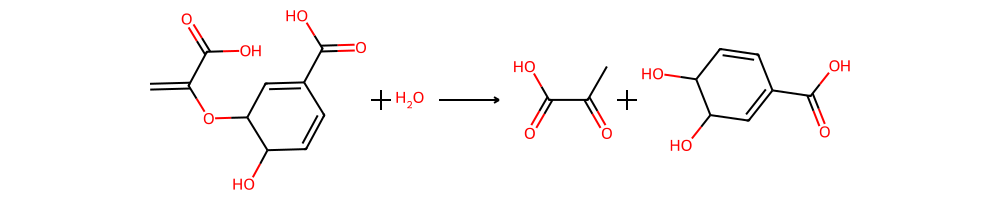

[('rid', 1220), ('rhea_ids', [16506]), ('imt_rules', ['rule0457_1']), ('weight', 1.0)]


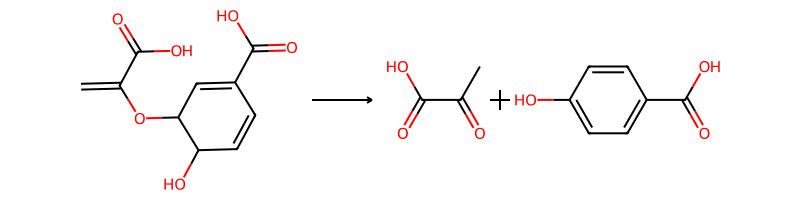

STEP 2 
[('rid', 2542), ('rhea_ids', [40672]), ('imt_rules', ['rule0161_1']), ('weight', 0.8333333333333334)]


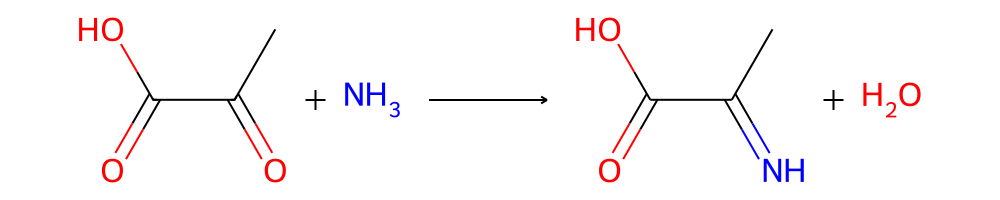

PATH TO 3,4-dihydroxybenzoate
STEP 1 
[('rid', 1220), ('rhea_ids', [16506]), ('imt_rules', ['rule0457_1']), ('weight', 1.0)]


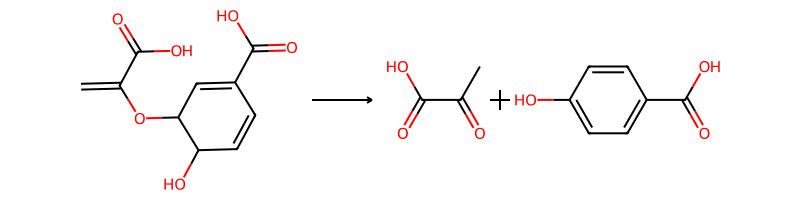

STEP 2 
[('rid', 9613), ('rhea_ids', [19479]), ('imt_rules', ['rule0005_38']), ('weight', 0.9090909090909091)]


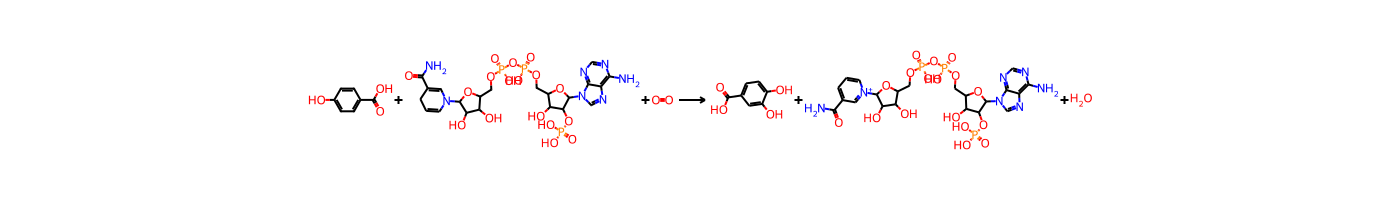

[('rid', 14890), ('rhea_ids', [19475]), ('imt_rules', ['rule0005_38']), ('weight', 0.9090909090909091)]


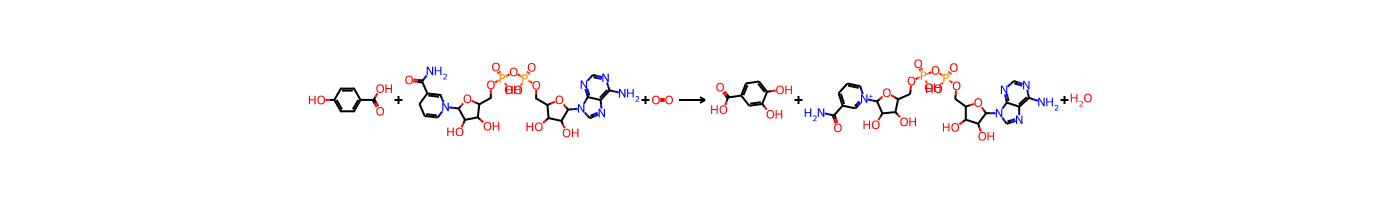

PATH TO 4-hydroxybenzoate
STEP 1 
[('rid', 1220), ('rhea_ids', [16506]), ('imt_rules', ['rule0457_1']), ('weight', 1.0)]


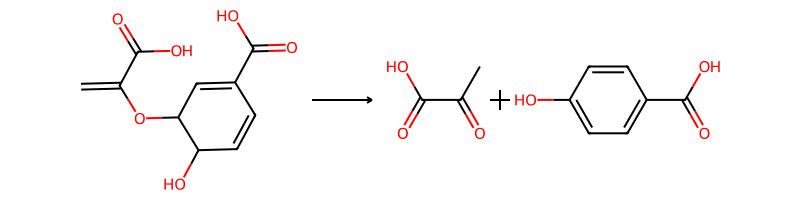

PATH TO pyruvate
STEP 1 
[('rid', 3291), ('rhea_ids', [38321]), ('imt_rules', ['rule0583_1']), ('weight', 0.8333333333333334)]


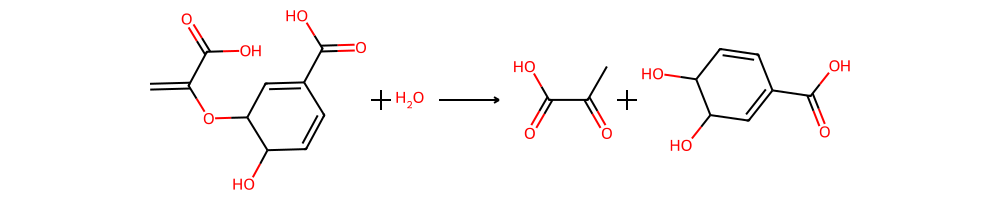

[('rid', 1220), ('rhea_ids', [16506]), ('imt_rules', ['rule0457_1']), ('weight', 1.0)]


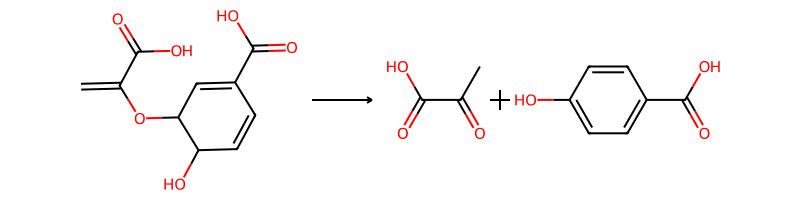

PATH TO N-methyl-L-alanine
STEP 1 
[('rid', 3291), ('rhea_ids', [38321]), ('imt_rules', ['rule0583_1']), ('weight', 0.8333333333333334)]


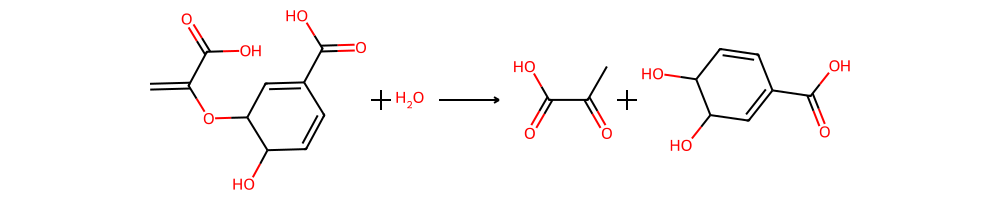

[('rid', 1220), ('rhea_ids', [16506]), ('imt_rules', ['rule0457_1']), ('weight', 1.0)]


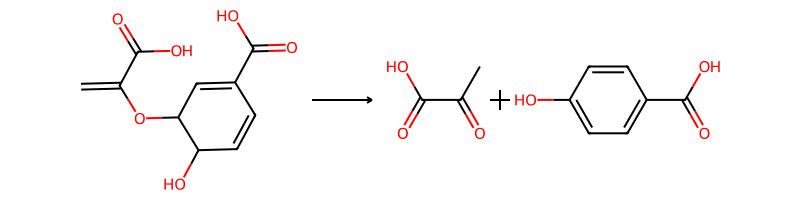

STEP 2 
[('rid', 1624), ('rhea_ids', [21770]), ('imt_rules', ['rule0156_2']), ('weight', 0.7142857142857143)]


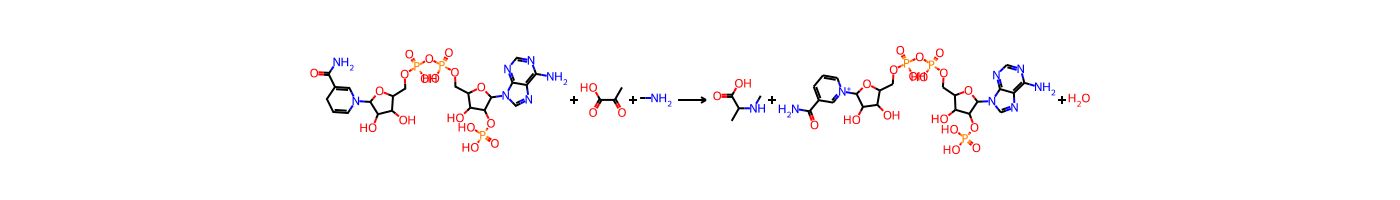

PATH TO (2S)-2-acetolactate
STEP 1 
[('rid', 3291), ('rhea_ids', [38321]), ('imt_rules', ['rule0583_1']), ('weight', 0.8333333333333334)]


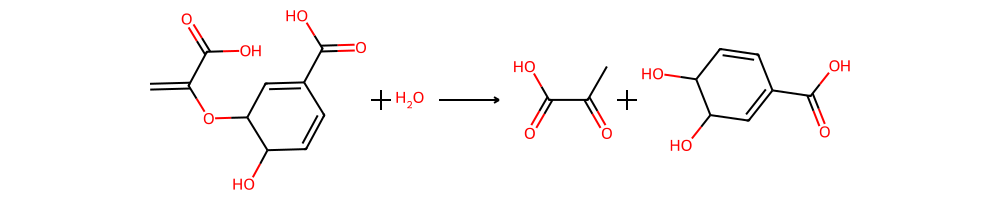

[('rid', 1220), ('rhea_ids', [16506]), ('imt_rules', ['rule0457_1']), ('weight', 1.0)]


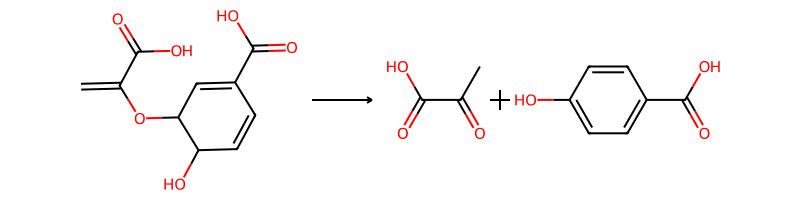

STEP 2 
[('rid', 641), ('rhea_ids', [25250]), ('imt_rules', ['rule0273_2']), ('weight', 0.6666666666666666)]


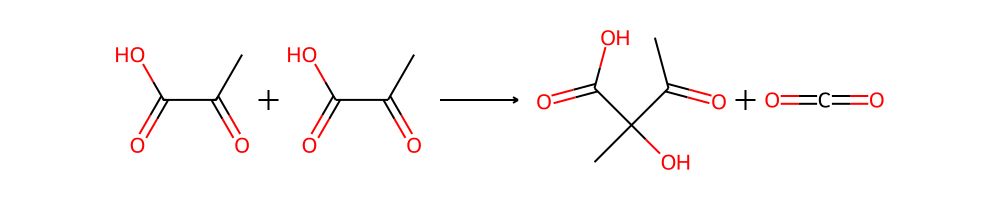

PATH TO 4-amino-4-deoxychorismate
STEP 1 
[('rid', 2845), ('rhea_ids', [11673]), ('imt_rules', ['rule0361_1']), ('weight', 0.9375)]


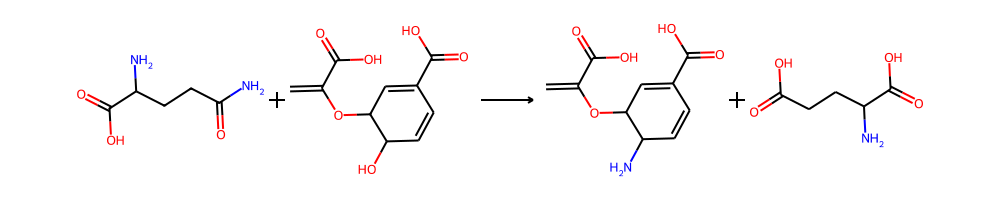

PATH TO chorismate
PATH TO (S)-acetoin;(R)-acetoin
STEP 1 
[('rid', 3291), ('rhea_ids', [38321]), ('imt_rules', ['rule0583_1']), ('weight', 0.8333333333333334)]


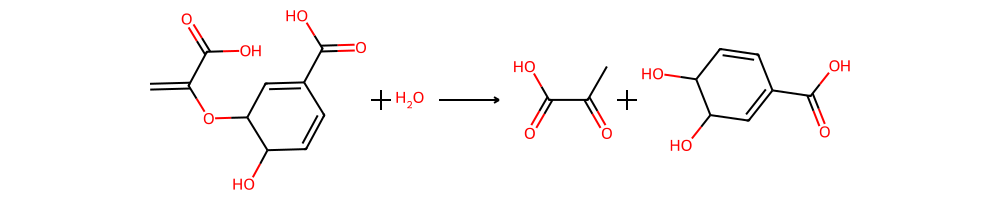

[('rid', 1220), ('rhea_ids', [16506]), ('imt_rules', ['rule0457_1']), ('weight', 1.0)]


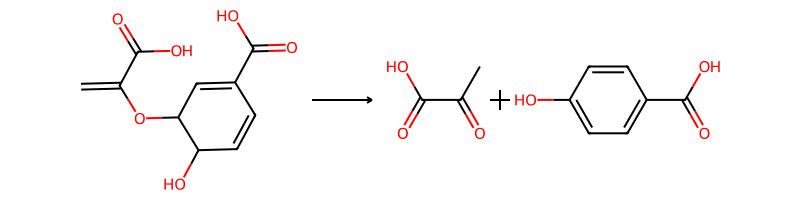

STEP 2 
[('rid', 6852), ('rhea_ids', [54369]), ('imt_rules', ['rule0273_5']), ('weight', 0.5)]


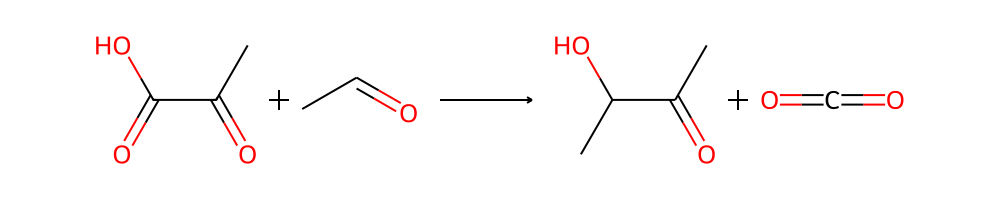

PATH TO phenol
STEP 1 
[('rid', 1220), ('rhea_ids', [16506]), ('imt_rules', ['rule0457_1']), ('weight', 1.0)]


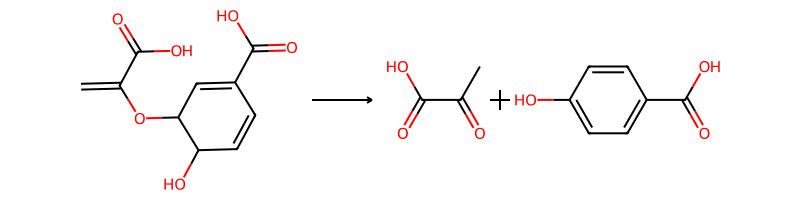

STEP 2 
[('rid', 5950), ('rhea_ids', [10877]), ('imt_rules', ['rule0024_24']), ('weight', 1.0)]


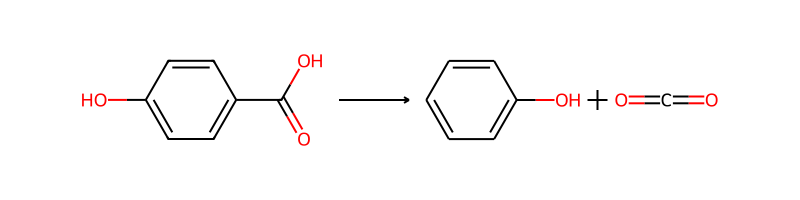

PATH TO isochorismate
STEP 1 
[('rid', 6748), ('rhea_ids', [18986]), ('imt_rules', ['rule0028_50']), ('weight', 1.0)]


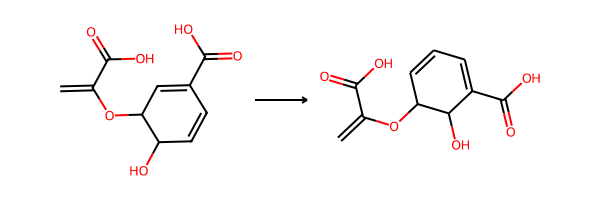

PATH TO (4R)-4-hydroxy-2-oxoglutarate;(4S)-4-hydroxy-2-oxoglutarate
STEP 1 
[('rid', 3291), ('rhea_ids', [38321]), ('imt_rules', ['rule0583_1']), ('weight', 0.8333333333333334)]


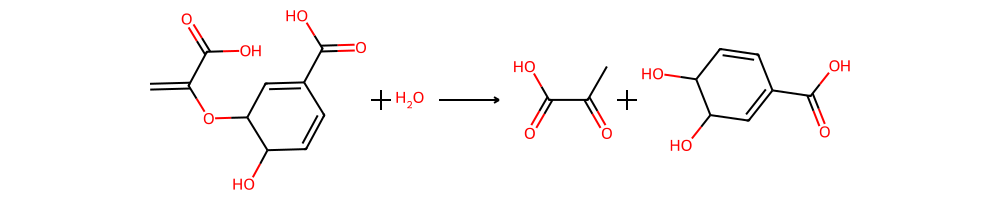

[('rid', 1220), ('rhea_ids', [16506]), ('imt_rules', ['rule0457_1']), ('weight', 1.0)]


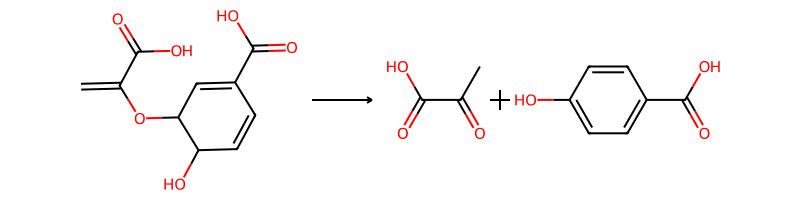

STEP 2 
[('rid', 2343), ('rhea_ids', [30688, 35640]), ('imt_rules', ['rule0053_10']), ('weight', 0.5454545454545454)]


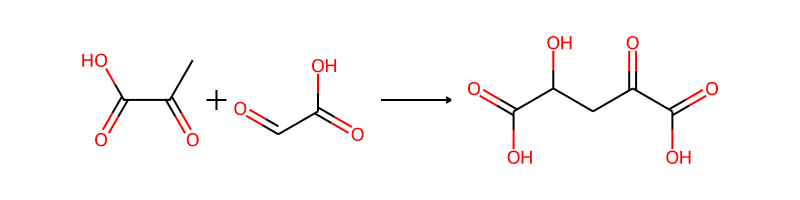

PATH TO phosphoenolpyruvate
STEP 1 
[('rid', 3291), ('rhea_ids', [38321]), ('imt_rules', ['rule0583_1']), ('weight', 0.8333333333333334)]


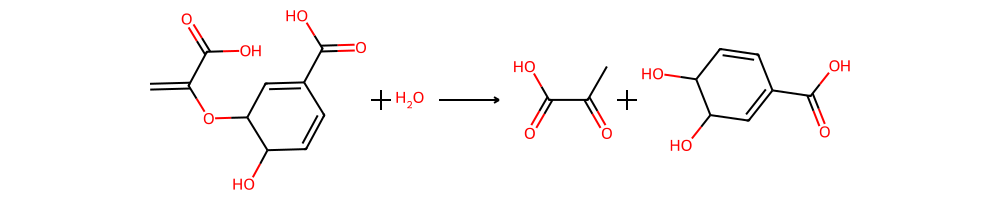

[('rid', 1220), ('rhea_ids', [16506]), ('imt_rules', ['rule0457_1']), ('weight', 1.0)]


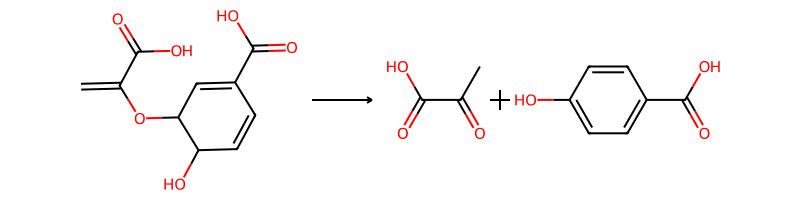

STEP 2 
[('rid', 7717), ('rhea_ids', [19998]), ('imt_rules', ['rule1090_1']), ('weight', 0.5)]


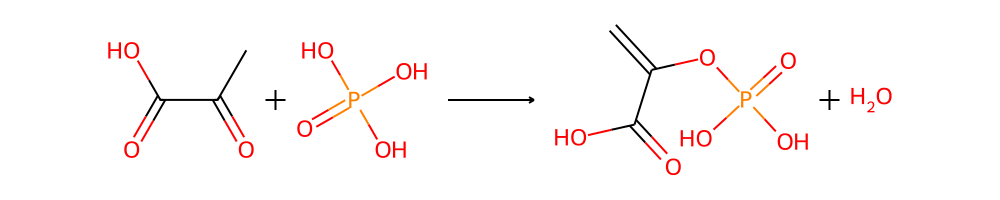

[('rid', 1127), ('rhea_ids', [18158]), ('imt_rules', ['rule0409_1']), ('weight', 0.6)]


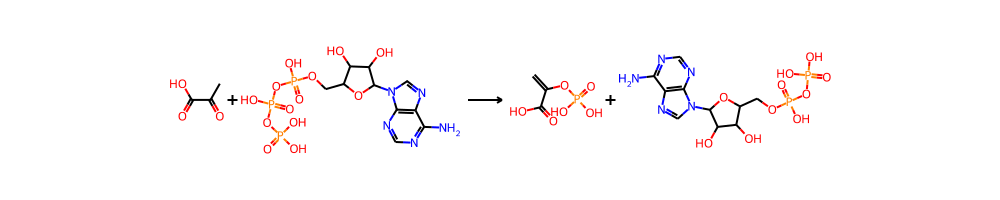

PATH TO 2-dehydro-3-deoxy-D-gluconate
STEP 1 
[('rid', 3291), ('rhea_ids', [38321]), ('imt_rules', ['rule0583_1']), ('weight', 0.8333333333333334)]


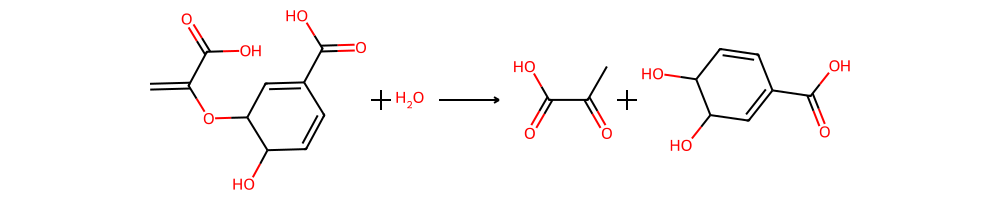

[('rid', 1220), ('rhea_ids', [16506]), ('imt_rules', ['rule0457_1']), ('weight', 1.0)]


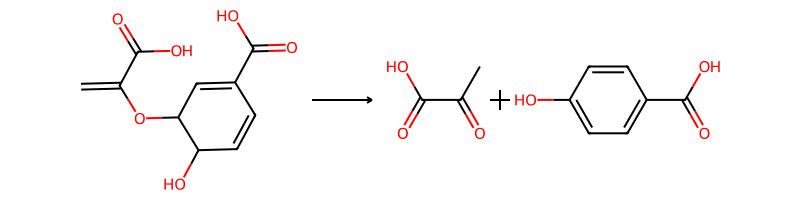

STEP 2 
[('rid', 9039), ('rhea_ids', [35584, 46117, 38108]), ('imt_rules', ['rule0053_07']), ('weight', 0.5)]


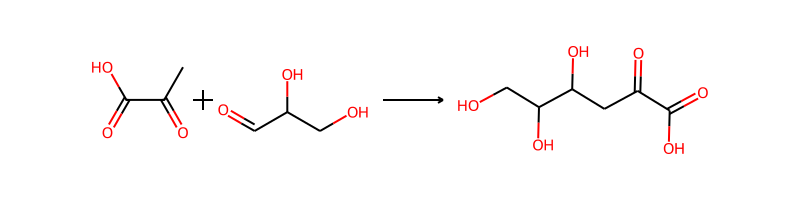

PATH TO lactate
STEP 1 
[('rid', 3291), ('rhea_ids', [38321]), ('imt_rules', ['rule0583_1']), ('weight', 0.8333333333333334)]


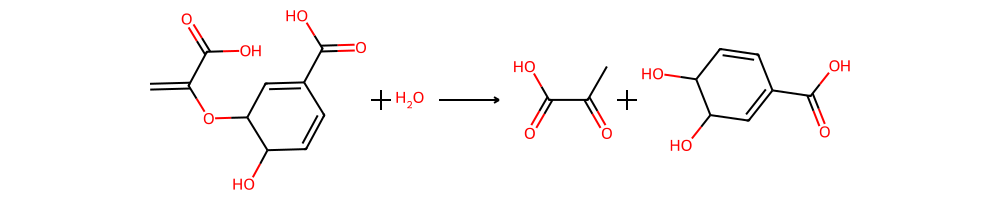

[('rid', 1220), ('rhea_ids', [16506]), ('imt_rules', ['rule0457_1']), ('weight', 1.0)]


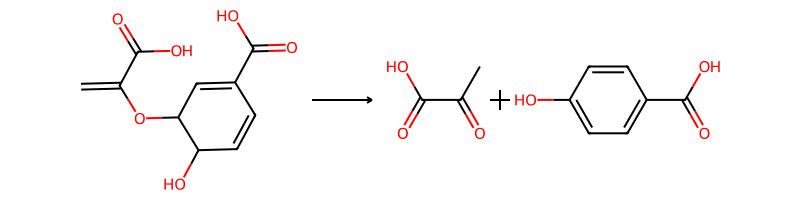

STEP 2 
[('rid', 6504), ('rhea_ids', [55869]), ('imt_rules', ['rule0074_17']), ('weight', 1.0)]


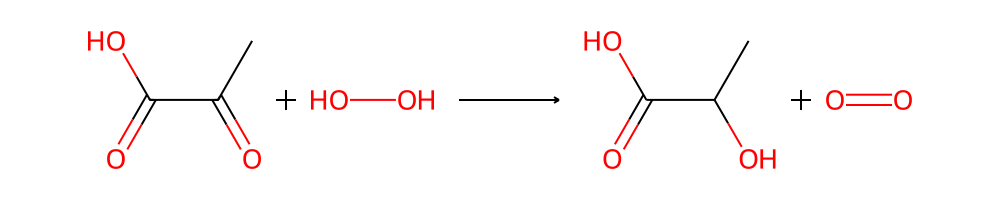

[('rid', 5347), ('rhea_ids', [51469]), ('imt_rules', ['rule0467_7']), ('weight', 1.0)]


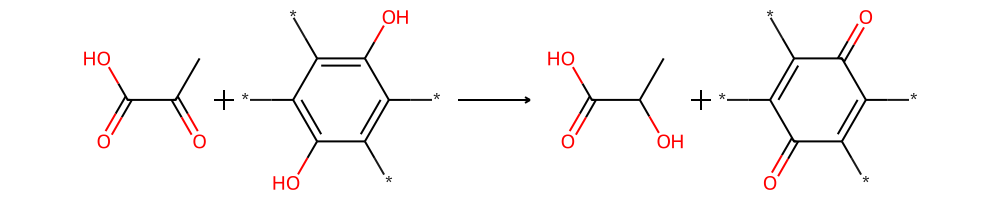

[('rid', 16424), ('rhea_ids', [62970]), ('imt_rules', ['rule0003_142']), ('weight', 1.0)]


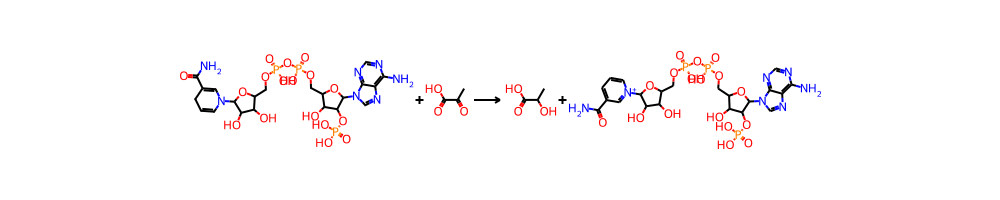

PATH TO a 3-acylpyruvate
STEP 1 
[('rid', 3291), ('rhea_ids', [38321]), ('imt_rules', ['rule0583_1']), ('weight', 0.8333333333333334)]


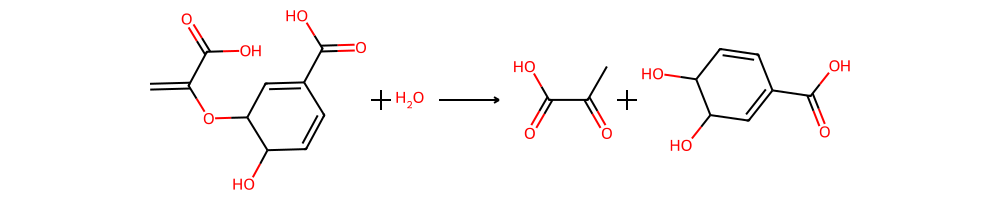

[('rid', 1220), ('rhea_ids', [16506]), ('imt_rules', ['rule0457_1']), ('weight', 1.0)]


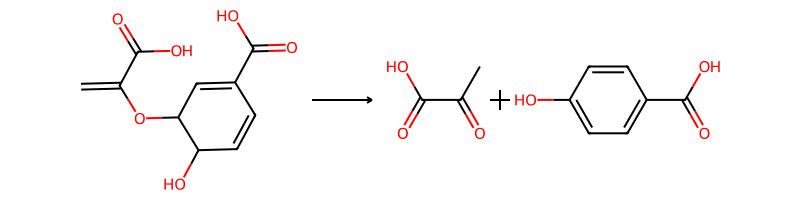

STEP 2 
[('rid', 5869), ('rhea_ids', [19010]), ('imt_rules', ['rule0085_2']), ('weight', 0.6666666666666666)]


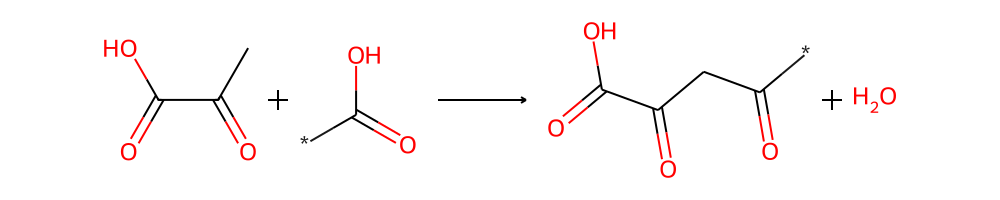

PATH TO 2-dehydro-3-deoxy-D-arabinonate;2-dehydro-3-deoxy-L-arabinonate
STEP 1 
[('rid', 3291), ('rhea_ids', [38321]), ('imt_rules', ['rule0583_1']), ('weight', 0.8333333333333334)]


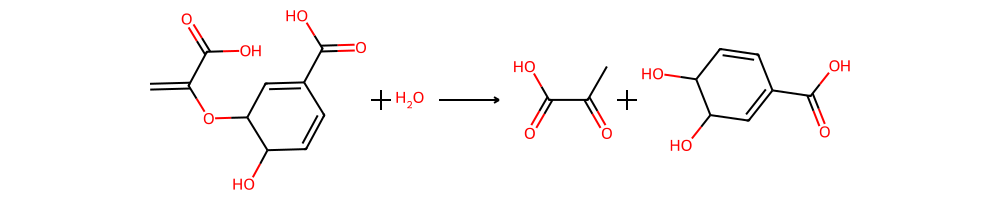

[('rid', 1220), ('rhea_ids', [16506]), ('imt_rules', ['rule0457_1']), ('weight', 1.0)]


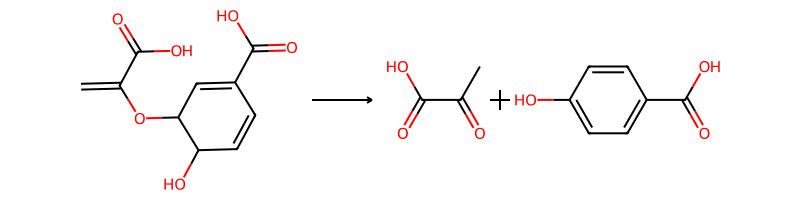

STEP 2 
[('rid', 8335), ('rhea_ids', [20610]), ('imt_rules', ['rule0053_10']), ('weight', 0.6)]


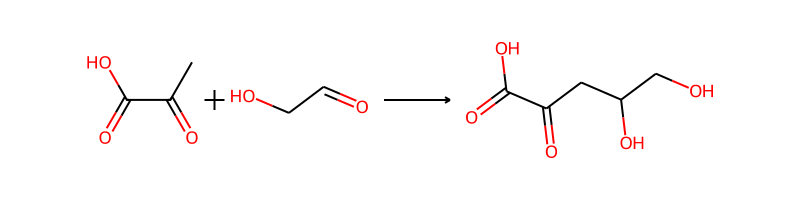

PATH TO 4-hydroxybenzaldehyde
STEP 1 
[('rid', 1220), ('rhea_ids', [16506]), ('imt_rules', ['rule0457_1']), ('weight', 1.0)]


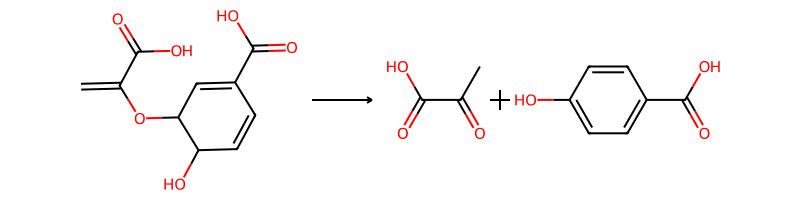

STEP 2 
[('rid', 13170), ('rhea_ids', [47938]), ('imt_rules', ['rule0025_15']), ('weight', 1.0)]


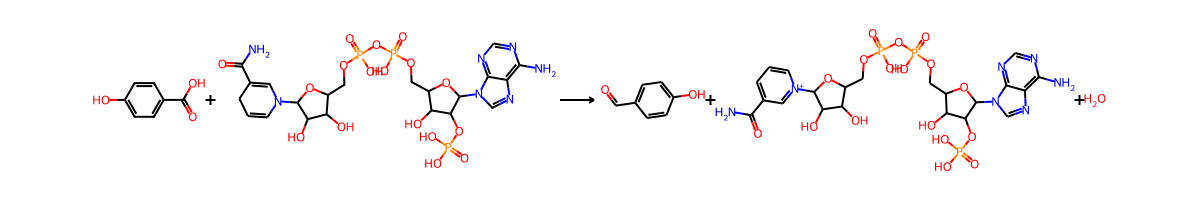

[('rid', 15838), ('rhea_ids', [20306]), ('imt_rules', ['rule0026_03']), ('weight', 1.0)]


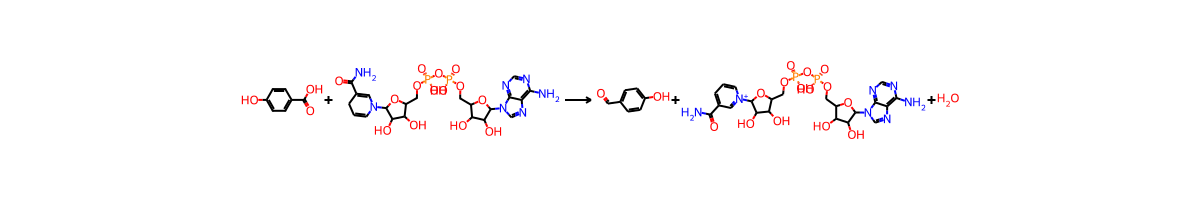

PATH TO (S)-4-hydroxy-2-oxohexanoate
STEP 1 
[('rid', 3291), ('rhea_ids', [38321]), ('imt_rules', ['rule0583_1']), ('weight', 0.8333333333333334)]


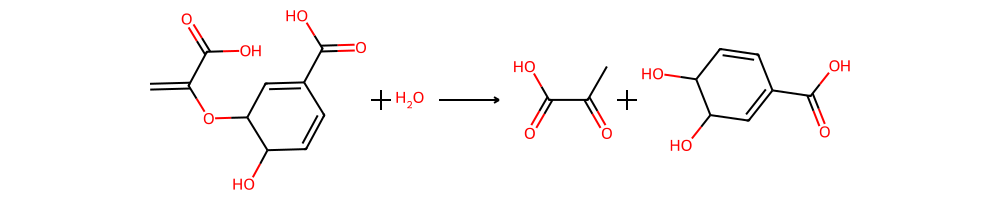

[('rid', 1220), ('rhea_ids', [16506]), ('imt_rules', ['rule0457_1']), ('weight', 1.0)]


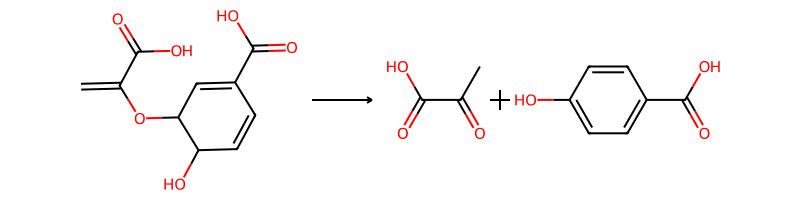

STEP 2 
[('rid', 991), ('rhea_ids', [36005]), ('imt_rules', ['rule0051_02']), ('weight', 0.6)]


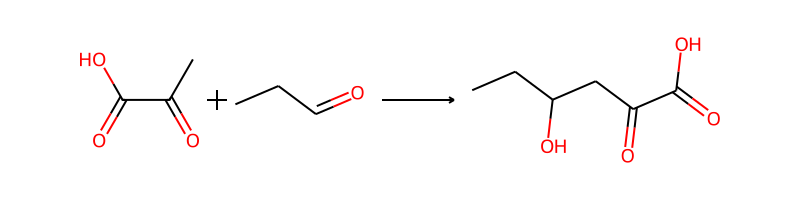

PATH TO salicylate
STEP 1 
[('rid', 6748), ('rhea_ids', [18986]), ('imt_rules', ['rule0028_50']), ('weight', 1.0)]


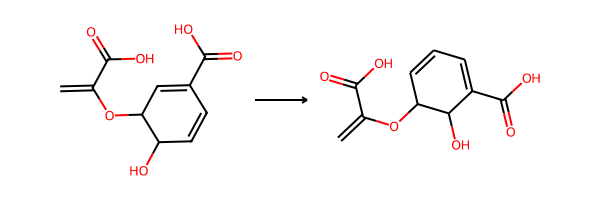

STEP 2 
[('rid', 8538), ('rhea_ids', [27875]), ('imt_rules', ['rule0457_1']), ('weight', 1.0)]


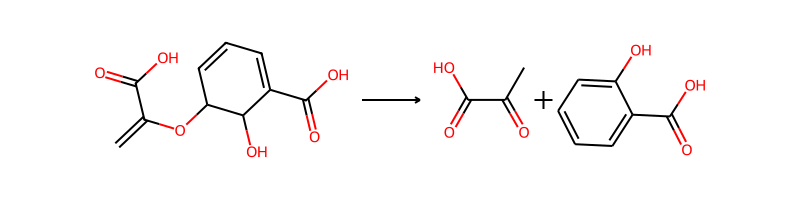

In [55]:
id = G.get_nodes_by_prop('name', 'chorismate')[0]
for i in nx.ego_graph(G, id, radius=2):
    print(f"PATH TO {G.nodes[i]['name']}")
    show_path(id, i)